# ARC graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
plt.tight_layout() # for saving

<Figure size 432x288 with 0 Axes>

In [3]:
# categories
con_set = {1,2,3,4,9,11,14,15,17,18,21,22}
csd_set = {5,6,7,8,10,12,13,16,19,20,23,24}

In [4]:
# data file
f = "Data/02/processed/arc_01.csv"
df1 = pd.read_csv(f)

In [5]:
# drop NaN from Sample Name
df1 = df1.dropna(subset =['Sample Name'])

# convert sample name to number
df1['Sample Name'] = df1['Sample Name'].str.split(expand = True)[1]
df1['Sample Name'] = pd.to_numeric(df1['Sample Name'])

In [6]:
df1["CON"] = df1["Sample Name"].isin(con_set)
df1['CSD'] = df1["Sample Name"].isin(csd_set)

df1["Check Category"] = df1["CON"] ^ df1["CSD"]

In [7]:
# check if all the samples are labeled (OK if 0)
df1[df1['Check Category'] == False].size

0

In [8]:
# create string column with category labels
df1['Category'] = 'CSD'
df1.loc[ df1['CON'] == True, 'Category'] = 'CON'

In [9]:
# drop sample 18
df1 = df1[df1['Sample Name'] != 18]  

In [10]:
# drop samples with Ct mean > 29

for sn in df1[df1['Cт Mean']>29]['Sample Name'].unique():
    df1 = df1[df1['Sample Name'] != sn] 

## Generating plots

### gk

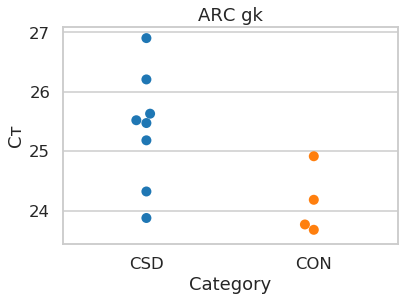

In [11]:
plt.title("ARC gk")
sns.swarmplot(x='Category', y='Cт', data=df1[df1['Target Name'] == 'gk'], size = 10)
plt.savefig("arc_gk_ct.png",  bbox_inches = 'tight', dpi = 300)

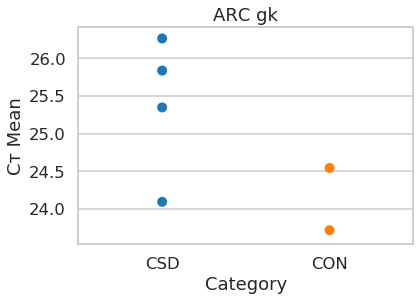

In [12]:
plt.title("ARC gk")
sns.swarmplot(x='Category', y='Cт Mean', data=df1[df1['Target Name'] == 'gk'].drop_duplicates(subset=['Sample Name']), size = 10)
plt.savefig("arc_gk_ctmean.png",  bbox_inches = 'tight', dpi = 300)

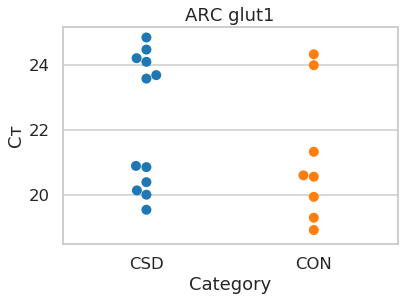

In [13]:
plt.title("ARC glut1")
sns.swarmplot(x='Category', y='Cт', data=df1[df1['Target Name'] == 'glut1'], size = 10)
plt.savefig("arc_glut1_ct.png",  bbox_inches = 'tight', dpi = 300)

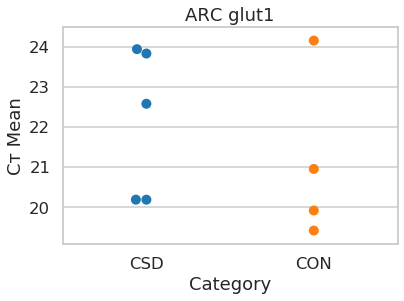

In [14]:
plt.title("ARC glut1")
sns.swarmplot(x='Category', y='Cт Mean', data=df1[df1['Target Name'] == 'glut1'].drop_duplicates(subset=['Sample Name']), size = 10)
plt.savefig("arc_glut1_ctmean.png",  bbox_inches = 'tight', dpi = 300)

### actb

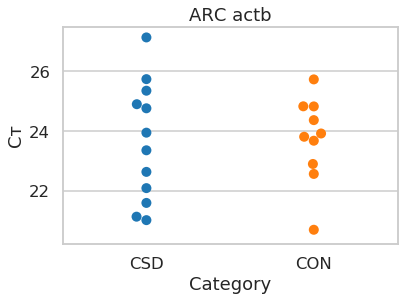

In [15]:
plt.title("ARC actb")
sns.swarmplot(x='Category', y='Cт', data=df1[df1['Target Name'] == 'actb'], size = 10)
plt.savefig("arc_actb_ct.png",  bbox_inches = 'tight', dpi = 300)

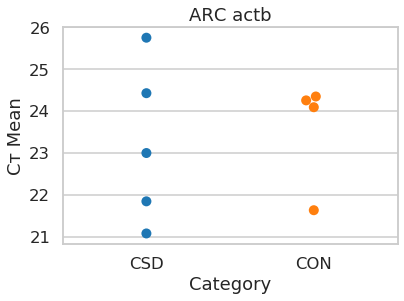

In [16]:
plt.title("ARC actb")
sns.swarmplot(x='Category', y='Cт Mean', data=df1[df1['Target Name'] == 'actb'].drop_duplicates(subset=['Sample Name']), size = 10)
plt.savefig("arc_actb_ctmean.png",  bbox_inches = 'tight', dpi = 300)

## delta Ct

In [17]:
data_gk = df1[df1['Target Name'] == 'gk'].drop_duplicates(subset=['Sample Name']).loc[:,['Sample Name','Cт Mean','Category']]
data_glut1 = df1[df1['Target Name'] == 'glut1'].drop_duplicates(subset=['Sample Name']).loc[:,['Sample Name','Cт Mean','Category']]
data_actb = df1[df1['Target Name'] == 'actb'].drop_duplicates(subset=['Sample Name']).loc[:,['Sample Name','Cт Mean','Category']]

data_actb1 = data_actb.drop(columns = ['Category']).rename({'Cт Mean':'Cт Mean actb'}, axis = 'columns')

data_gk = data_gk.merge(data_actb1[['Sample Name', 'Cт Mean actb']])
data_gk['ΔCт Mean'] = data_gk['Cт Mean'] -  data_gk['Cт Mean actb']

data_glut1 = data_glut1.merge(data_actb1[['Sample Name', 'Cт Mean actb']])
data_glut1['ΔCт Mean'] = data_glut1['Cт Mean'] -  data_glut1['Cт Mean actb']

In [18]:
data_gk.to_csv('arc_gk.csv')
data_glut1.to_csv('arc_glut1.csv')

### gk

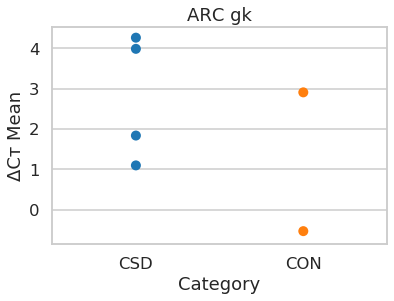

In [19]:
plt.title("ARC gk")
sns.swarmplot(x='Category', y='ΔCт Mean', data=data_gk, size = 10)
plt.savefig("arc_gk_delta_ctmean.png",  bbox_inches = 'tight', dpi = 300)

### glut1

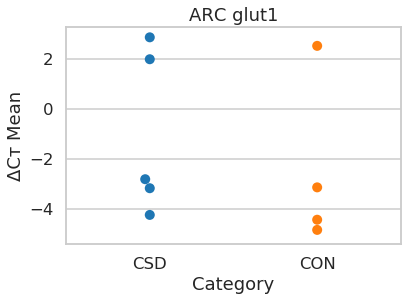

In [20]:
plt.title("ARC glut1")
sns.swarmplot(x='Category', y='ΔCт Mean', data=data_glut1, size = 10)
plt.savefig("arc_glut1_delta_ctmean.png",  bbox_inches = 'tight', dpi = 300)